In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lee1613/A-Spec-Data-Analysis/main/14%20nicest.txt", skiprows = 1, sep ="\t")
print(df)

      Actual Angular position  Light Intensity Ch A (%max)
0                        0.00                        0.049
1                        0.00                        0.029
2                        0.00                        0.078
3                        0.00                       -0.039
4                        0.00                        0.000
...                       ...                          ...
3635                     0.05                        0.166
3636                     0.05                        0.205
3637                     0.05                        0.166
3638                     0.05                        0.205
3639                     0.05                        0.166

[3640 rows x 2 columns]


In [ ]:
rename = {"Actual Angular position":"Angle(Radius)", "Light Intensity Ch A (%max)":"Light Intensity(%)"}

In [ ]:
df.rename(columns = rename,inplace= True)

,Angle(Radius),Light Intensity(%)
0,0.0,0.049
1,0.0,0.029
2,0.0,0.078
3,0.0,-0.039
4,0.0,0.000
5,0.0,-0.039
6,0.0,19.669
7,0.0,19.669
8,0.0,19.669
9,0.0,19.669


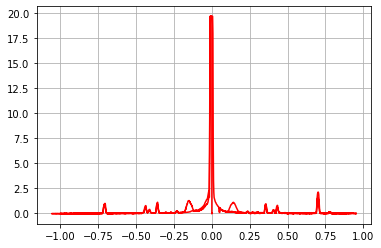

In [ ]:
plt.plot(df["Angle(Radius)"],df["Light Intensity(%)"],c = "r")
plt.grid("both")
#plt.minorticks_on()
df.head(15)

-0.0035


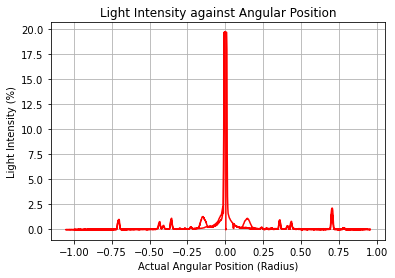

In [ ]:
# Centralised the graph to the centre so that it could be symmetrical along the y axis
angle,light = df["Angle(Radius)"],df["Light Intensity(%)"]
angle1,angle2 = angle[:1600], angle[1601:]
light1,light2 = light[:1600], light[1601:]
shift = (max(angle[light>19])+min(angle[light>19]))/2
print(shift)
angle -= shift
plt.plot(angle,light,c = "r")
plt.xlabel("Actual Angular Position (Radius)")
plt.ylabel("Light Intensity (%)")
plt.title("Light Intensity against Angular Position")
plt.grid()

In [ ]:
def r2w(radius):
    return 1666e-9*np.sin(radius)
def w2r(wavelength):
    return np.arcsin(wavelength*1e-9/1666e-9)

min_vis = w2r(400e-9)
max_vis = w2r(700e-9)
print(min_vis,max_vis)
wavelength = r2w(angle)*1e9



2.4009603841536614e-10 4.201680672268908e-10


0         5.830988
1         5.830988
2         5.830988
3         5.830988
4         5.830988
           ...    
1695   -269.535100
1696   -264.601739
1697   -261.311505
1698   -259.665996
1699   -256.374200
Name: Angle(Radius), Length: 1700, dtype: float64
[  4  20  40  70  88 106 129 193 212 251 275 291 308 335 355]


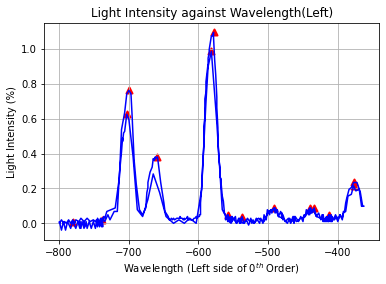

In [ ]:
### Extension (Find any possible peaks outside the visible light)

from scipy.signal import find_peaks
wavelength1 = wavelength[:1700]
print(wavelength1)
wavelength1 = wavelength1[(abs(wavelength1)<=800)&(abs(wavelength)>=360)]
light1 = light[:1700][(abs(wavelength1)<=800)&(abs(wavelength)>=360)]

left_peaks = find_peaks(light1.values,height = 0.01, distance =15, prominence = 0.03)
print(left_peaks[0])
plt.plot(wavelength1,light1,c = "b")
plt.scatter(wavelength1.iloc[left_peaks[0]],light1.iloc[left_peaks[0]], lw=2, color='red', marker = '^')
plt.xlabel("Wavelength (Left side of $0^{th}$ Order)")
plt.ylabel("Light Intensity (%)")
plt.title("Light Intensity against Wavelength(Left)")
plt.grid()



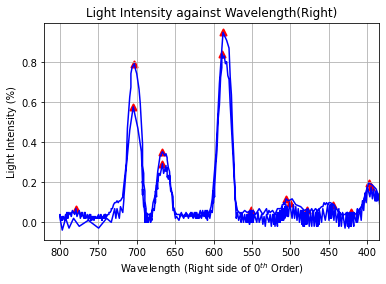

In [ ]:
### Extension (Find any possible peaks outside the visible light)

wavelength2 = wavelength[1700:]
wavelength2 = wavelength2[(abs(wavelength)<=800)&(abs(wavelength)>=360)]
light2 = light[1700:][(abs(wavelength)<=800)&(abs(wavelength)>=360)]

right_peaks = find_peaks(light2.values,height = 0.01, distance =15, prominence = 0.05)
plt.plot(wavelength2,light2,c = "b")
plt.scatter(wavelength2.iloc[right_peaks[0]],light2.iloc[right_peaks[0]], lw=2, color='red', marker = '^')
plt.xlim(820,385)
plt.xlabel("Wavelength (Right side of $0^{th}$ Order)")
plt.ylabel("Light Intensity (%)")
plt.title("Light Intensity against Wavelength(Right)")
plt.grid()


0         5.830988
1         5.830988
2         5.830988
3         5.830988
4         5.830988
           ...    
1695   -269.535100
1696   -264.601739
1697   -261.311505
1698   -259.665996
1699   -256.374200
Name: Angle(Radius), Length: 1700, dtype: float64


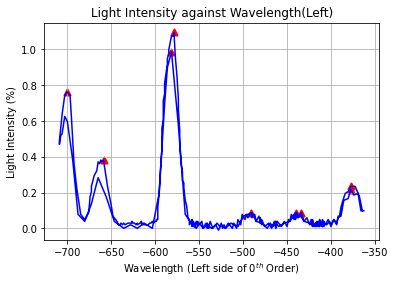

In [ ]:
### True Measurement

from scipy.signal import find_peaks
wavelength1 = wavelength[:1700]
print(wavelength1)
wavelength1 = wavelength1[(abs(wavelength1)<=710)&(abs(wavelength)>=360)]
light1 = light[:1700][(abs(wavelength1)<=710)&(abs(wavelength)>=360)]

left_peaks = find_peaks(light1.values,height = 0.01, distance =15, prominence = 0.05)
#print(left_peaks[0])
plt.plot(wavelength1,light1,c = "b")
plt.scatter(wavelength1.iloc[left_peaks[0]],light1.iloc[left_peaks[0]], lw=2, color='red', marker = '^')
plt.xlabel("Wavelength (Left side of $0^{th}$ Order)")
plt.ylabel("Light Intensity (%)")
plt.title("Light Intensity against Wavelength(Left)")
plt.grid()

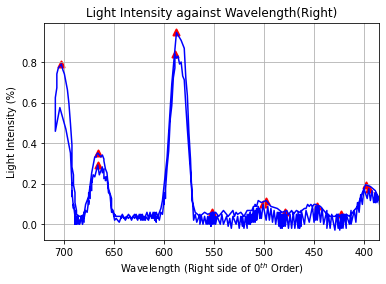

In [ ]:
### True Measurement 

wavelength2 = wavelength[1700:]
wavelength2 = wavelength2[(abs(wavelength)<=710)&(abs(wavelength)>=360)]
light2 = light[1700:][(abs(wavelength)<=710)&(abs(wavelength)>=360)]

right_peaks = find_peaks(light2.values,height = 0.01, distance =15, prominence = 0.05)
plt.plot(wavelength2,light2,c = "b")
plt.scatter(wavelength2.iloc[right_peaks[0]],light2.iloc[right_peaks[0]], lw=2, color='red', marker = '^')
plt.xlim(720,385)
plt.xlabel("Wavelength (Right side of $0^{th}$ Order)")
plt.ylabel("Light Intensity (%)")
plt.title("Light Intensity against Wavelength(Right)")
plt.grid()

In [ ]:
match = {}
for left in left_peaks[0]:
    for right in right_peaks[0]:
        if abs(wavelength1.iloc[left]+wavelength2.iloc[right])<20:
            match[left] = right
print(match)

{4: 27, 40: 67, 70: 406, 129: 372, 193: 334, 212: 276, 236: 372, 263: 67, 283: 27}


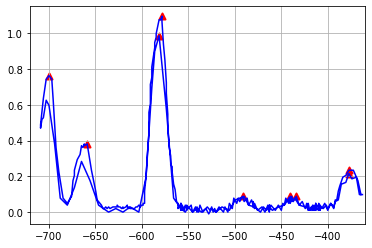

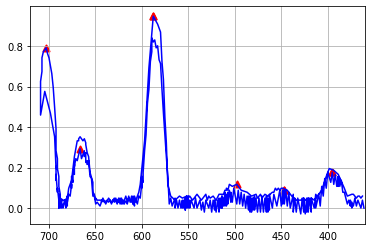

In [ ]:
plt.plot(wavelength1,light1,c = "b")
plt.scatter(wavelength1.iloc[list(match.keys())],light1.iloc[list(match.keys())], lw=2, color='red', marker = '^')
plt.xlim(-720,-360)

plt.grid()
plt.show()

plt.plot(wavelength2,light2,c = "b")
plt.scatter(wavelength2.iloc[list(match.values())],light2.iloc[list(match.values())], lw=2, color='red', marker = '^')
plt.xlim(720,360)
plt.grid()



In [ ]:
l_spectrum = np.array(wavelength1.iloc[list(match.keys())])
r_spectrum = np.array(wavelength2.iloc[list(match.values())])
print(l_spectrum)
print(r_spectrum)

[-377.37693551 -433.9285846  -491.54080749 -578.3044166  -658.73135232
 -699.80267146 -581.42807471 -440.35908325 -377.37693551]
[395.20340163 446.78253617 497.90420443 587.6684013  666.37427741
 702.82506363 587.6684013  446.78253617 395.20340163]


In [ ]:

# Decided to clean the noise data after observing the graph
### Do not run this cell multiple time!!!
#match.pop(20)
match.pop(40)
match.pop(236)
match.pop(283)
print(match)
print(l_spectrum,r_spectrum)
# This indicates that the 
deviation = np.mean(l_spectrum+r_spectrum)
print(deviation)
#wavelength1 -= deviation
#wavelength2 -= deviation


{4: 27, 70: 406, 129: 372, 193: 334, 212: 276, 263: 67}
[-377.37693551 -433.9285846  -491.54080749 -578.3044166  -658.73135232
 -699.80267146 -581.42807471 -440.35908325 -377.37693551] [395.20340163 446.78253617 497.90420443 587.6684013  666.37427741
 702.82506363 587.6684013  446.78253617 395.20340163]
9.72926246568669


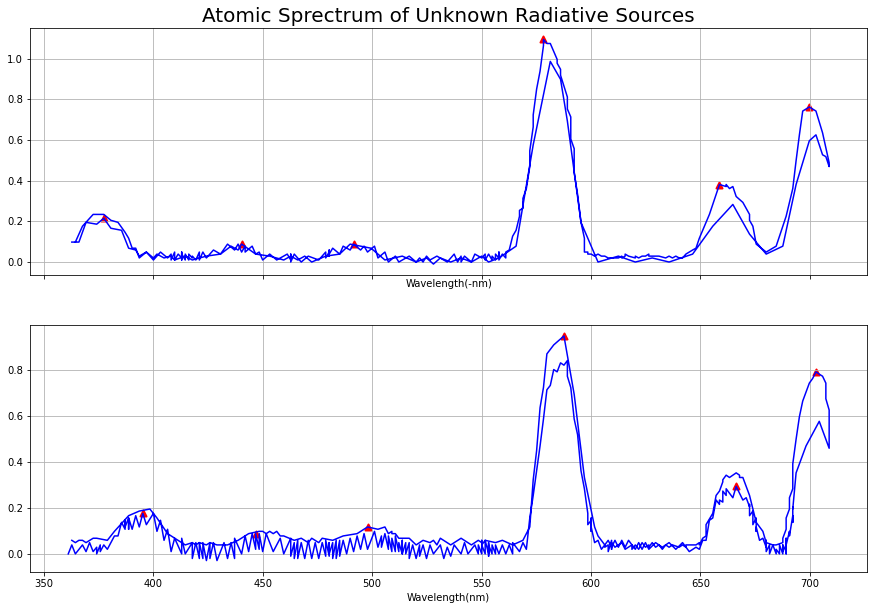

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (15,10),sharex=True)
ax[0].plot(abs(wavelength1),light1,c = "b")
ax[0].scatter(abs(wavelength1.iloc[list(match.keys())]),light1.iloc[list(match.keys())], lw=2, color='red', marker = '^')
ax[0].set_xlabel("Wavelength(-nm)")
ax[0].set_title("Atomic Sprectrum of Unknown Radiative Sources",size=20)

ax[0].grid()

ax[1].plot(wavelength2,light2,c = "b")
ax[1].scatter(wavelength2.iloc[list(match.values())],light2.iloc[list(match.values())], lw=2, color='red', marker = '^')
ax[1].set_xlabel("Wavelength(nm)")

plt.grid()

In [ ]:
l_spectrum = np.array(wavelength1.iloc[list(match.keys())])
l_sp_intensity = np.array(light1.iloc[list(match.keys())])
l_sp_radius = w2r(l_spectrum)

r_spectrum = np.array(wavelength2.iloc[list(match.values())])
r_sp_intensity = np.array(light2.iloc[list(match.values())])
r_sp_radius = w2r(r_spectrum)

print((r_spectrum-l_spectrum)/2)
print((r_sp_intensity+l_sp_intensity)/2)
print((r_sp_radius-l_sp_radius)/2)

[386.29016857 494.72250596 582.98640895 662.55281486 701.31386755
 443.57080971]
[0.1955 0.1025 1.0205 0.337  0.7765 0.088 ]
[0.234  0.3015 0.3575 0.409  0.4345 0.2695]
